# Chapter 8 In-Chapter Examples

In [2]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# define global figure properties used for publication
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'savefig.dpi':300,          # output resolution
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 8.1: Pie charts 

In [3]:
# how to get equal areas for some number of pie slices
k = 2
np.tile(1/k,k)

array([0.5, 0.5])

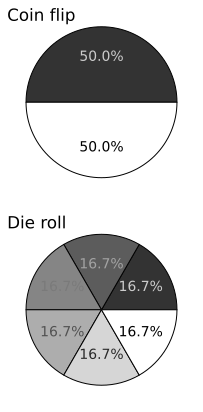

In [4]:
_,axs = plt.subplots(2,1,figsize=(4,6))

for a,k in zip(axs,[2,6]):

  # draw the pie (and export the patches and text to update the color)
  patches,_,autotexts = a.pie(np.tile(1/k,k),autopct='%.1f%%',wedgeprops={'edgecolor':'k'},
        colors=np.linspace((.2,.2,.2),(1,1,1),k))

  for autotext, patch in zip(autotexts,patches):
    inverse_color = 1 - np.array(patch.get_facecolor())
    inverse_color[-1] = 1 # invert the color, but not the alpha
    autotext.set_color(inverse_color)

axs[0].set_title('Coin flip',y=.9)
axs[1].set_title('Die roll',y=.9)

plt.tight_layout()
plt.show()

### Fig 8.4: Visualizing probability masses and densities

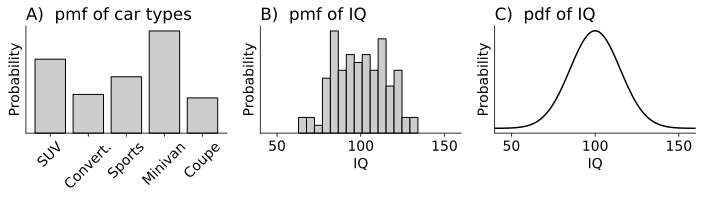

In [6]:
# categorical probability data
categoryLabels = [ 'SUV','Convert.','Sports','Minivan','Coupe' ]
categoryData = np.random.randint(low=5,high=30,size=len(categoryLabels)).astype(np.float64)
categoryData /= np.sum(categoryData)

# discrete numerical probability data
empiricalIQ = np.random.normal(loc=100,scale=15,size=100)

# continuous (analytic) probability data
x = np.linspace(-4,4,101)
continuousData = stats.norm.pdf(x)*15 + 100


### visualize!
_,axs = plt.subplots(1,3,figsize=(10,3))

# categorical data in bars
axs[0].bar(categoryLabels,categoryData,color=[.8,.8,.8],edgecolor='k')
axs[0].set_title(r'A)  pmf of car types')
axs[0].set(ylabel='Probability',yticks=[])
axs[0].tick_params(axis='x',rotation=45)

# empirical probability data that estimate a density, still in bars
axs[1].hist(empiricalIQ,bins=15,color=[.8,.8,.8],edgecolor='k')
axs[1].set(xlabel='IQ',ylabel='Probability',yticks=[],xlim=[40,160])
axs[1].set_title(r'B)  pmf of IQ')

# analytical probability density as a line
axs[2].plot(x*15+100,continuousData,'k')
axs[2].set(xlabel='IQ',ylabel='Probability',yticks=[],xlim=[40,160])
axs[2].set_title(r'C)  pdf of IQ')

plt.tight_layout()
plt.show()

### Fig 8.5: Probability mass function of penguin weights

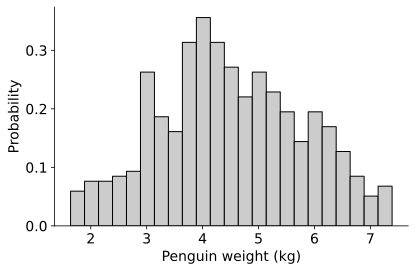

In [7]:
penguins = np.arctanh(np.random.uniform(size=473)*1.8-.9)*2+4.5

bin_edges = np.arange(np.min(penguins),np.max(penguins),step=.25)

plt.figure(figsize=(6,4))
plt.hist(penguins,bins=bin_edges,density=True,
         color=[.8,.8,.8],edgecolor='k')
plt.xlabel('Penguin weight (kg)')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()